In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import funcoes as func

from datetime import datetime

Neste aquivo vamos transformar o dataset para um formato que nos permita aplicar o conjunto de dados a modelos de machine learning de aprendizados supervisionados.

In [3]:
datasetTreino = pd.read_csv("./Dataset/train.csv")
data = datasetTreino.date.apply(lambda linha: datetime.strptime(linha, '%Y-%m-%d'))

datasetTreino['date'] = data
datasetTreino.set_index('date', inplace = True)
datasetTreino.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


Sabemos que a série não é estacionária. Para resolver isso há algumas formas dentre elas:

* Aplicar raiz quadrada aos elementos do vetor;
* Aplicar raiz cúbica aos elemetos do vetor;
* Aplicar o log;
* Aplicar a primeira diferença.

Pelo quesito simplicidade e resultado razoável usarei o método da raiz quadrada.

In [3]:
dataEstacionario = datasetTreino.copy()
dataEstacionario['sales_F'] = datasetTreino['sales'].apply(lambda x: np.sqrt(x))

No gráfico abaixo, notamos que o primeiro gráfico varia menos do que o segundo.

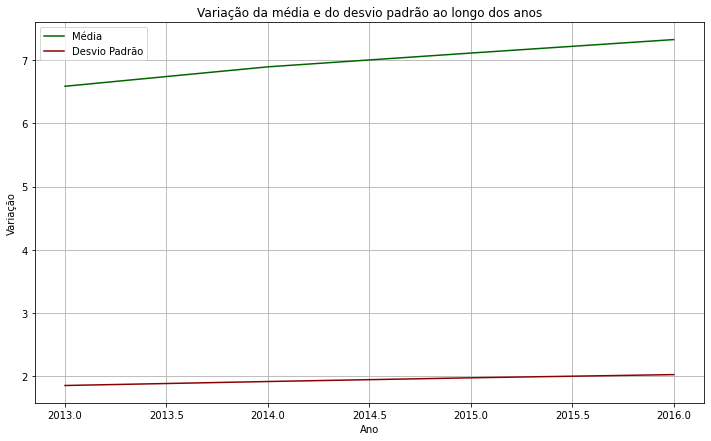

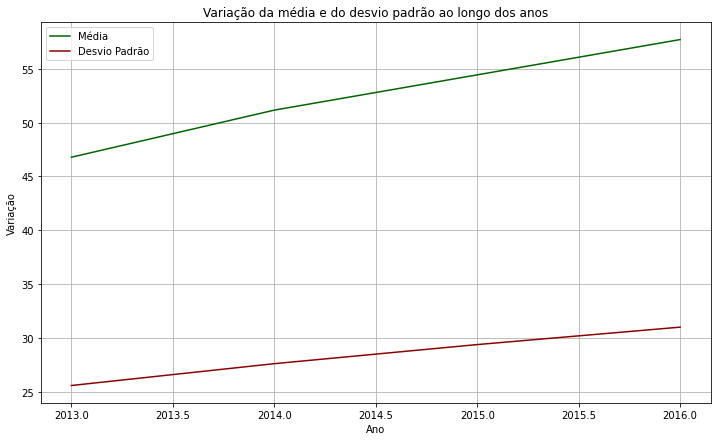

In [4]:
ts = dataEstacionario['sales_F']
tsNaoEstacionario = datasetTreino.sales

func.rolling(ts)
func.rolling(tsNaoEstacionario)

### Engenharia de atributos 

Como há muito poucos atributos será necessário fazer um trabalho de engenharia de atributos. Basicamente, a ideia aqui será destrinchar a variável `date` em várias colunas.

In [5]:
dataEstacionario = func.addNewColumns(dataEstacionario)
dataEstacionario

,store,item,sales,sales_F,ano,mes,dia,diaSemana,trimestre
date,,,,,,,,,
2013-01-01,1,1,13,3.605551,2013,1,1,1,1
2013-01-02,1,1,11,3.316625,2013,1,2,2,1
2013-01-03,1,1,14,3.741657,2013,1,3,3,1
2013-01-04,1,1,13,3.605551,2013,1,4,4,1
2013-01-05,1,1,10,3.162278,2013,1,5,5,1
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,7.937254,2017,12,27,2,4
2017-12-28,10,50,59,7.681146,2017,12,28,3,4
2017-12-29,10,50,74,8.602325,2017,12,29,4,4


Falta treinar o modelo agora. Para não perde todo o trabalho feito até agora vamos salvar o dataset modificado!

In [6]:
dataEstacionario.to_csv("./DataTreinoModificada.csv")

Continuação no arquivo __`Machine Learning`__!